# Gradient methods

Gradient methods are a class of optimization methods that utilize the gradient of the function that we try to optimize. As before, the problem we try to solve is
\begin{equation}
\min_{x \in X} f(x)
\end{equation}
where $f \colon X \to \mathbb{R}$ is the function we are optimizing. For gradient methods, we then assume that the derivative of $f$ always exists and that we can obtain it. There is a range of different gradient methods; in these notes, we will only consider gradient descent and the conjugate gradient method. For the descent methods, we will see that the main problem is to find the step length when we move in the direction of descent. Trying to find the minima in the search direction is called a <i>line search</i>, and is a recurring problem in descent methods. Based on Newton's method, we can use the Hessian (the matrix containing the second-order partial derivatives) to decide the step length for a general problem where all second-order partial derivatives exist and are smooth. When the problem arises from a quadratic form, we have an explicit solution to the line search problem. Further, conjugating the space arising from a quadratic form, we get the efficient conjugate gradient method.

Gradient methods are very efficient for smooth problems with few local extrema. However, for noisy problems with many local extrema, they tend to converge too early towards a local extrema that can be far away from the global solution.

## Bracket search revisited

In the previous section, we considered bracket search methods. We observed that the convergence was related to the reduction in distance between the brackets in each iteration. We will get the fastest convergence if we move both the $\alpha$ and $\beta$ values close to the midpoint. The only information we need in the bracket search methods is to compare the value of the two function evaluations $f(\alpha)$ and $f(\beta)$. The midpoint is $(b+a)/2$, and if we let both $\alpha \to (b-a)/2$ and $\beta \to (b+a)/2$, then this information is given by the gradient in $(b+a)/2$. In other words, if we know $f'((b+a)/2)$, we know which bracket to move: If $f'((b+a)/2) < 0$, we change bracket $a$ to $(b+a)/2$, otherwise we move bracket $b$ to $(b+a)/2$. This bracket search using the gradient is shown below.


0.0 1.0 0.12241743810962724
0.0 0.5
0.0 0.5 -0.46891242171064473
0.25 0.5
0.25 0.5 -0.1805076219123143
0.375 0.5
0.375 0.5 -0.030813683425936378
0.4375 0.5
0.4375 0.5 0.04536630063300562
0.4375 0.46875
0.4375 0.46875 0.007166559439861553
0.4375 0.453125
0.4375 0.453125 -0.011851103237941474
0.4453125 0.453125
Number of iterations:  7


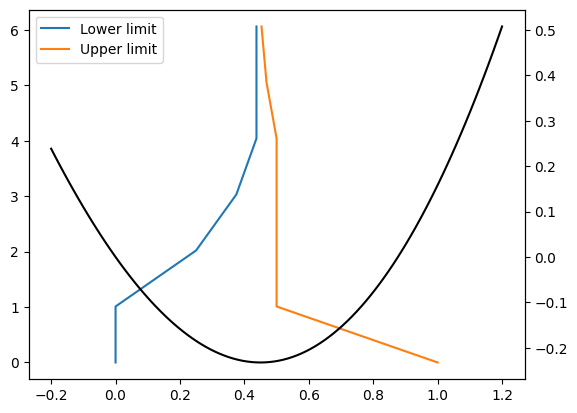

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#The function to minimize
def func(fx):
    return fx**2 - np.sin(fx)

#The derivative of this function
def grad(fx):
    return 2*fx - np.cos(fx)

#Error tolerance
feps = 1e-2

#Maximum number of iterations
iN=100

#Storing values during run for later plotting
afA=np.zeros(iN)
afB=np.zeros(iN)

#Starting values for our interval [a,b]
afA[0] = 0
afB[0] = 1

# We iterate over ii
ii=0
while(ii<iN and (afB[ii]-afA[ii])>feps):
    print(afA[ii],afB[ii],grad((afB[ii]+afA[ii])/2))
    if grad((afB[ii]+afA[ii])/2)>0:
        afA[ii+1]=afA[ii]
        afB[ii+1]=(afB[ii]+afA[ii])/2
    else:
        afA[ii+1]=(afB[ii]+afA[ii])/2
        afB[ii+1]=afB[ii]
    ii+=1
    print(afA[ii],afB[ii])

print('Number of iterations: ',ii)

xv = np.linspace(-0.2,1.2,100)
nn = np.linspace(0,iN,iN)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(afA[:ii],nn[:ii],label='Lower limit')
ax1.plot(afB[:ii],nn[:ii],label='Upper limit')
ax2.plot(xv,func(xv),color='k')
ax1.legend(loc='upper left')
plt.show()  

In the following sections, we will explore several methods that employ the gradient (derivative), and sometimes the Hessian (double-derivative), to find extrema.

[Previous note](bracketSearch.ipynb) -- [Next note](gradientDescent.ipynb)